# El detector ineficiente

Convolución de una variable de Poisson y otra de Bernoulli

In [1]:
%matplotlib notebook

In [2]:
import numpy as np
from scipy.stats import poisson
import matplotlib.pyplot as plt
import boost_histogram as bh 
from matplotlib.ticker import MaxNLocator

Eficiencia del detector

In [3]:
eficiencia = 0.5

Número promedio de partículas incidentes

In [4]:
mu = 10

Número de eventos simulados

In [5]:
eventos_simulados = 1000

Histograma de frecuencia del número de partículas incidentes y detectadas

In [6]:
kmax = 2*mu
histo_incidentes = bh.Histogram(bh.axis.Integer(0, kmax))
histo_detectadas = bh.Histogram(bh.axis.Integer(0, kmax))

In [7]:
rng = np.random.default_rng()

In [8]:
for evento in range(eventos_simulados):
    # print("Evento ", evento)
    incidentes = rng.poisson(mu)
    histo_incidentes.fill(incidentes)
    # print("Número de partículas incidentes = ", incidentes)
    resultado = rng.binomial(n=1, p=eficiencia, size=incidentes)
    # print("Resultado = ", resultado)
    detectadas = resultado.sum()
    histo_detectadas.fill(detectadas)
    # print("Número de partículas detectadas = ", detectadas)

## Distribución de partículas incidentes

In [9]:
resultados = np.arange(0,kmax)

In [10]:
np.array([6.4,4.8])*0.6

array([3.84, 2.88])

<IPython.core.display.Javascript object>


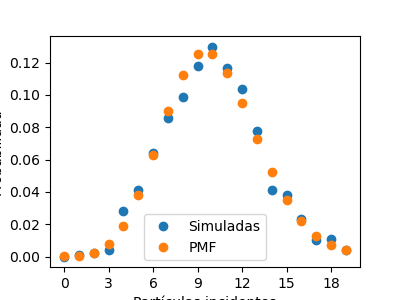

In [11]:
fig1 = plt.figure( figsize=(4,3) ) 
ax1 = fig1.subplots()
ax1.set_xlabel('Partículas incidentes')
ax1.set_ylabel('Probabilidad')
ax1.xaxis.set_major_locator(MaxNLocator(integer=True))
ax1.plot(resultados, histo_incidentes/eventos_simulados, 'o', label='Simuladas')
ax1.plot(resultados, poisson.pmf(resultados, mu), 'o', label='PMF')
plt.legend()

Funciones de masa de probabilidad 

In [12]:
## Distribución de partículas detectadas

In [13]:
mu1 = mu * eficiencia
mu1

5.0

<IPython.core.display.Javascript object>


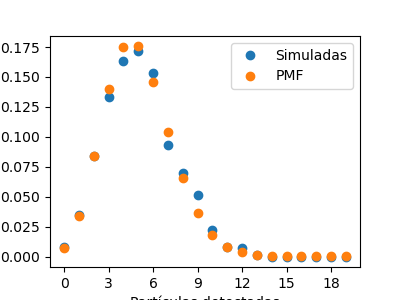

In [14]:
fig2 = plt.figure(figsize=(4,3))
ax2 = fig2.subplots()
ax2.set_xlabel('Partículas detectadas')
ax2.set_ylabel('Probabilidad')
ax2.xaxis.set_major_locator(MaxNLocator(integer=True))
ax2.plot(resultados, histo_detectadas/eventos_simulados, 'o', label='Simuladas')
ax2.plot(resultados, poisson.pmf(resultados, mu1), 'o', label='PMF')
plt.legend()